# Visualizing dislocation stress fields


From Hull and Bacon (2011), Chapter 4, pages 67-70. 

The stresses around a screw dislocation are given by:

$$\sigma_{zx}=2G\varepsilon_{zx}=-\dfrac{Gb}{2\pi}\dfrac{y}{(x^2+y^2)}$$

and 

$$\sigma_{zy}=2G\varepsilon_{zy}=\dfrac{Gb}{2\pi}\dfrac{x}{(x^2+y^2)}$$


The stresses around an edge dislocation are given by:


$$\sigma_{xx}=-D y \frac{(3x^2+y^2)}{(x^2+y^2)^2}$$

$$\sigma_{yy}=D y \frac{(x^2-y^2)}{(x^2+y^2)^2}$$

$$\sigma_{xy}=D x \frac{(x^2-y^2)}{(x^2+y^2)^2}$$

where $D=\frac{Gb}{2\pi(1-\nu)}$

$$\sigma_{zz}=-\nu(\sigma_{xx}+\sigma_{yy})$$

All other components of stress are zero.

The effective pressure, p, is given by:

$$p=\sigma_{H}=\frac{1}{3}(\sigma_{xx}+\sigma_{yy}+\sigma_{zz})$$

##  Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib

Using matplotlib backend: Qt5Agg


## Functions for using the equations above to calculate stress fields

In [2]:
def sigmaXX(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    sXX=(-D*(y-Oy)*(3*(x-Ox)**2+(y-Oy)**2))/(((x-Ox)**2+(y-Oy)**2)**2)*sign
    return sXX

def sigmaYY(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    sYY=(D*(y-Oy)*((x-Ox)**2-(y-Oy)**2))/(((x-Ox)**2+(y-Oy)**2)**2)*sign
    return sYY

def sigmaXY(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    sXY=D*(x-Ox)*((x-Ox)**2-(y-Oy)**2)/(((x-Ox)**2+(y-Oy)**2)**2)*sign
    return sXY

def screw_sigmaZX(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    sZX=-D*(y-Oy)/((x-Ox)**2+(y-Oy)**2)*sign
    return sZX

def screw_sigmaZY(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    sZY=-D*(x-Ox)/((x-Ox)**2+(y-Oy)**2)*sign
    return sZY

def screw_sigmaTZ(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    sTZ=D/(np.sqrt((x-Ox)**2+(y-Oy)**2))*sign
    return sTZ

def sigmaZZ(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    sZZ=-2*nu*D*((y-Oy)/(x-Ox)**2+(y-Oy)**2)
    return sZZ
    
def press(x_axis,y_axis,Ox,Oy,D,sign):
    x,y=np.meshgrid(x_axis,y_axis)
    p=(sigmaXX(x_axis,y_axis,Ox,Oy,D,sign)+
       sigmaYY(x_axis,y_axis,Ox,Oy,D,sign)+
       sigmaZZ(x_axis,y_axis,Ox,Oy,D,sign))/3
    return p


def f_edge(x_axis,y_axis,Ox,Oy,D,sign):
    f_x=sigmaXY(x_axis,y_axis,Ox,Oy,D,sign)*b
    f_y=-sigmaXX(x_axis,y_axis,Ox,Oy,D,sign)*b
    return f_x,f_y

def single_dislocation(stress,character='edge'):    
    plt.figure(figsize=(7,5))
    plt.pcolormesh(X_axis,Y_axis,stress,vmin=-1e7,vmax=1e7,cmap='Spectral_r',shading='gouraud')
    if character=='edge':
        plt.plot(0,0,marker=mtop,markeredgecolor='white',markersize=10,markeredgewidth=2)
    if character!='edge':
        plt.plot(0,0,marker='+',markeredgecolor='white',markersize=10,markeredgewidth=2)
    plt.axis('Off')
    plt.axis('Equal')
    plt.colorbar()
    
def two_dislocations(component='xx'):
    if component=='xx':
        stress=sigmaXX(X_axis,Y_axis,-0.5e-6,-0.5e-6,D,1)+sigmaXX(
                      X_axis,Y_axis,0.5e-6,0.5e-6,D,1)
    if component=='xy':
        stress=sigmaXY(X_axis,Y_axis,-0.5e-6,-0.5e-6,D,1)+sigmaXY(
                      X_axis,Y_axis,0.5e-6,0.5e-6,D,1)
    if component=='tz':
        stress=screw_sigmaTZ(X_axis,Y_axis,-0.5e-6,-0.5e-6,D,1)+screw_sigmaTZ(
                      X_axis,Y_axis,0.5e-6,0.5e-6,D,-1)
    stress_fig,ax=plt.subplots(figsize=(7,5))
    fig=ax.imshow(stress,vmin=-5e7,vmax=5e7,cmap='Spectral_r',origin='lower')
    if component=='tz':
        dis1,=ax.plot(49.5,49.5,'+',mec='white',ms=10,mew=2,lw=0)
        dis2,=ax.plot(149.5,149.5,'.',mec='white',mfc='white',ms=10,mew=2,lw=0)
    else:
        dis1,=ax.plot(50,50,marker=mtop,mec='white',ms=10,mew=2,lw=0)
        dis2,=ax.plot(150,150,marker=mbot,mec='white',ms=10,mew=2,lw=0)
    ax.axis('Off')
    ax.axis('Equal')
    ax.axis('Tight')
    if component=='xx':
        ax.set_title(r'$\sigma_{xx}$')
    if component=='xy':
        ax.set_title(r'$\sigma_{xy}$')
    if component=='tz':
        ax.set_title(r'$\sigma_{\theta z}$')
    stress_fig.colorbar(fig,label='Pa')
    return fig, dis1,dis2

def add_dislocation(fig,dis1,dis2,Ox,Oy,sign,component='xx'):
    Ox_image=(Ox)*(2*a)/199.5-a
    Oy_image=(Oy)*(2*a)/199.5-a
    
    if component=='xx':
        stress_xx1=sigmaXX(X_axis,Y_axis,0.0,0.0,D,sign)
        stress_xx2=sigmaXX(X_axis,Y_axis,Ox_image,Oy_image,D,1)
        stress=stress_xx1+stress_xx2
    if component=='xy':
        stress_xy1=sigmaXY(X_axis,Y_axis,0.0,0.0,D,sign)
        stress_xy2=sigmaXY(X_axis,Y_axis,Ox_image,Oy_image,D,1)
        stress=stress_xy1+stress_xy2
    if component=='tz':
        stress_tz2=screw_sigmaTZ(X_axis,Y_axis,0.0,0.0,D,sign)
        stress_tz1=screw_sigmaTZ(X_axis,Y_axis,Ox_image,Oy_image,D,1)
        stress=stress_tz1+stress_tz2
        
    fig.set_data(stress)
    if sign==1:
        dis1.set_ydata([100,Oy])
        dis1.set_xdata([100,Ox])
        dis2.set_ydata([0])
        dis2.set_xdata([0])
    if sign==-1:
        dis1.set_ydata([100])
        dis1.set_xdata([100])
        dis2.set_ydata([Oy])
        dis2.set_xdata([Ox])

## Material parameters 

$nu=0.3$

$G=30 \mathrm{GPa}$

$b= 0.2 \mathrm{nm}$

Area around dislocation: $2\times2 \mathrm{\mu m}$

In [3]:
nu=0.3
G=30e9
b=2e-10
D=G*b/(1*np.pi*(1-nu))
D_screw=G*b/(2*np.pi)
a=1.0e-6
X_axis=np.linspace(-a,a,num=200)
Y_axis=np.linspace(-a,a,num=200)

## Edge dislocation

The next cell creates edge dislocation markers to mark the dislocation position.

In [4]:
mbot = ((-7, 0), (0, 0), (0, -8), (0, 0), (7, 0))
mtop = ((-7, 0), (0, 0), (0, 8), (0, 0), (7, 0))

Next we plot all the fields for the edge dislocation.

Text(0.5,1,'$\\sigma_{xx}$')

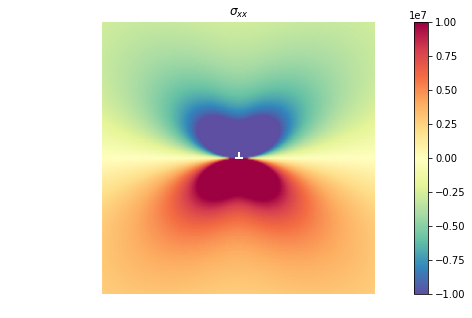

In [5]:
stress_xx=sigmaXX(X_axis,Y_axis,0.0,0.0,D,1)
single_dislocation(stress_xx)
plt.title(r'$\sigma_{xx}$')

Text(0.5,1,'$\\sigma_{yy}$')

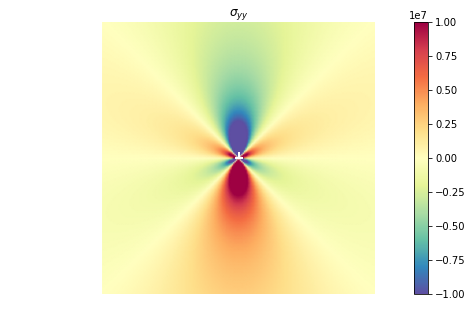

In [6]:
stress_yy=sigmaYY(X_axis,Y_axis,0.0,0.0,D,1)
single_dislocation(stress_yy)
plt.title(r'$\sigma_{yy}$')

Text(0.5,1,'$\\sigma_{xy}$')

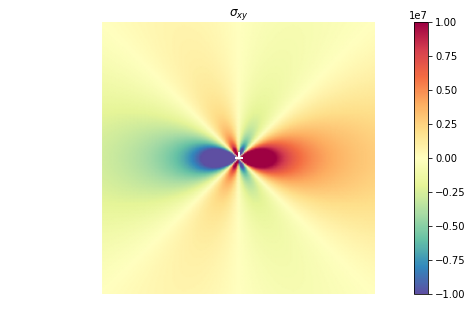

In [7]:
stress_xy=sigmaXY(X_axis,Y_axis,0.0,0.0,D,1)
single_dislocation(stress_xy)
plt.title(r'$\sigma_{xy}$')

Text(0.5,1,'$\\sigma_{zz}$')

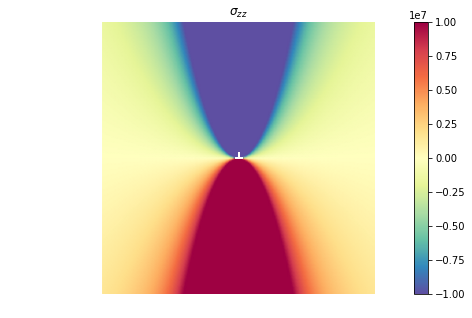

In [8]:
stress_zz=sigmaZZ(X_axis,Y_axis,0.0,0.0,D,1)
single_dislocation(stress_zz)
plt.title(r'$\sigma_{zz}$')

<IPython.core.display.Javascript object>


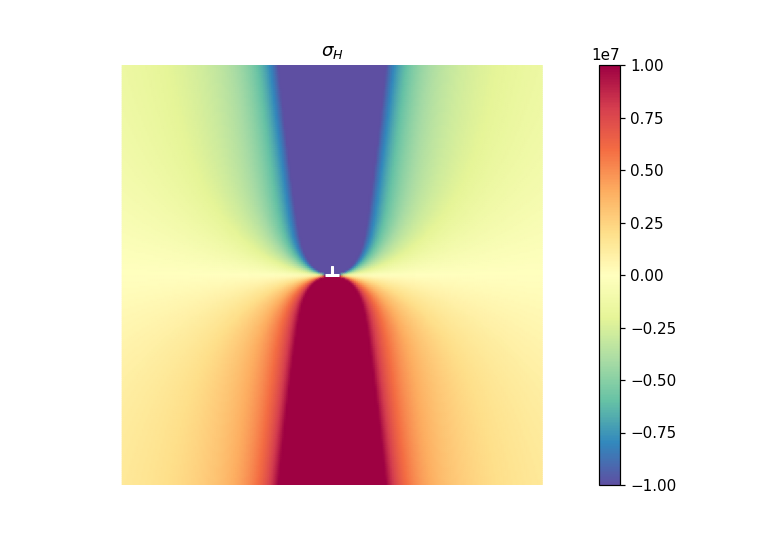

Text(0.5,1,'$\\sigma_{H}$')

In [8]:
pressure=press(X_axis,Y_axis,0.0,0.0,D,1)
single_dislocation(pressure)
plt.title(r'$\sigma_{H}$')

## Screw


Stress fields for a screw dislocation.

<IPython.core.display.Javascript object>


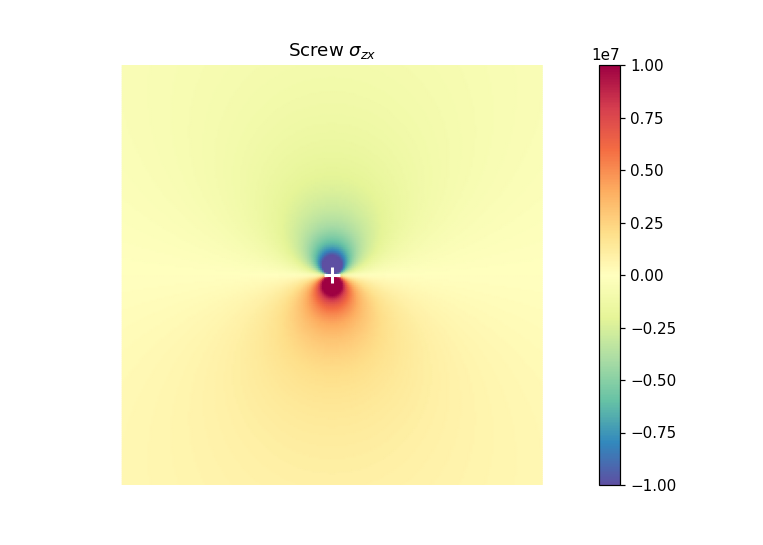

Text(0.5,1,'Screw $\\sigma_{zx}$')

In [9]:
stress_zx_screw=screw_sigmaZX(X_axis,Y_axis,0.0,0.0,D_screw,1)
single_dislocation(stress_zx_screw,character='screw')
plt.title(r'Screw $\sigma_{zx}$')

<IPython.core.display.Javascript object>


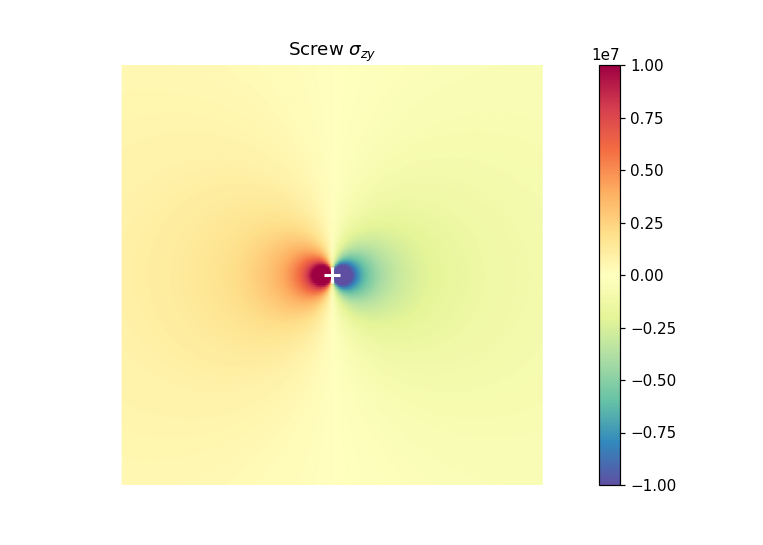

Text(0.5,1,'Screw $\\sigma_{zy}$')

In [11]:
stress_zy_screw=screw_sigmaZY(X_axis,Y_axis,0.0,0.0,D_screw,1)
single_dislocation(stress_zy_screw,character='screw')
plt.title(r'Screw $\sigma_{zy}$')

In [ ]:
stress_tz_screw=screw_sigmaTZ(X_axis,Y_axis,0.0,0.0,D_screw,1)
single_dislocation(stress_tz_screw,character='screw')
plt.title(r'RH Screw $\sigma_{\theta z}$')

<IPython.core.display.Javascript object>


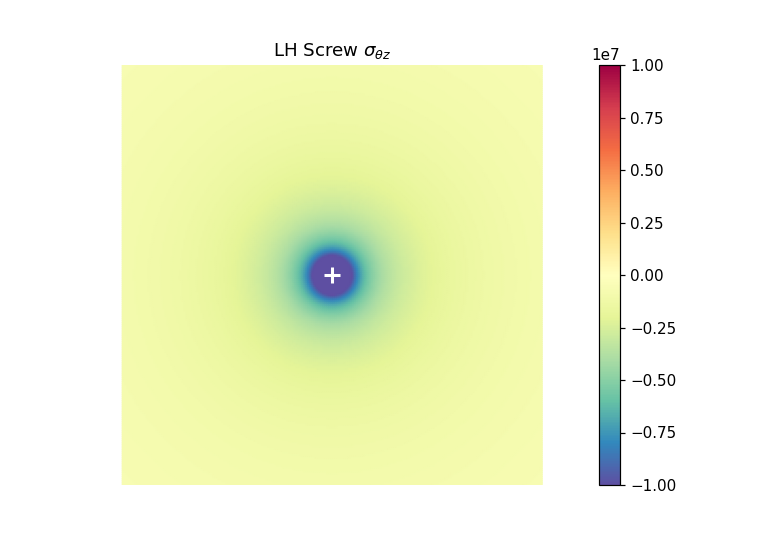

Text(0.5,1,'LH Screw $\\sigma_{\\theta z}$')

In [12]:
stress_tz_screw=screw_sigmaTZ(X_axis,Y_axis,0.0,0.0,D_screw,-1)
single_dislocation(stress_tz_screw,character='screw')
plt.title(r'LH Screw $\sigma_{\theta z}$')

## Edge dislocation pair

Stress field for a pair of edge dislocations. Feel free to change the stress component that is being plotted to see the effects.

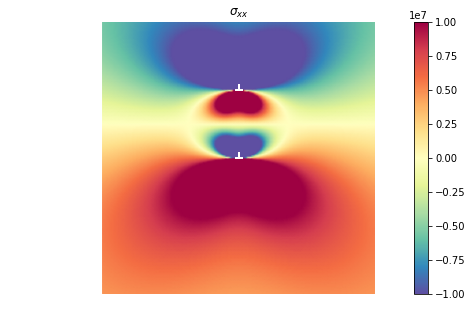

In [9]:
stress_xx1=sigmaXX(X_axis,Y_axis,0.0,0.0,D,1)
o_x=0.0
o_y=0.5e-6
stress_xx2=sigmaXX(X_axis,Y_axis,o_x,o_y,D,1)
stress_xx=stress_xx1+stress_xx2
plt.figure(figsize=(7,5))
plt.pcolormesh(X_axis,Y_axis,stress_xx,vmin=-1e7,vmax=1e7,cmap='Spectral_r',shading='gouraud')
plt.plot(0,0,marker=mtop,markeredgecolor='white',markersize=10,markeredgewidth=2)
plt.plot(o_x,o_y,marker=mtop,markeredgecolor='white',markersize=10,markeredgewidth=2)
plt.axis('Off')
plt.axis('Equal')
plt.title(r'$\sigma_{xx}$')
plt.colorbar()

### Interactive 

In [14]:
%matplotlib qt5

In [15]:
fig,dis1,dis2=two_dislocations()

In [16]:
interactive(add_dislocation, fig=fixed(fig), component=fixed('xx'), dis1=fixed(dis1),dis2=fixed(dis2),
            Ox=(0,200),Oy=(0,200),
            sign={"Opposite sign":-1,"Same sign":1})

interactive(children=(IntSlider(value=100, description='Ox', max=200), IntSlider(value=100, description='Oy', …

In [17]:
fig,dis1,dis2=two_dislocations(component='xy')

In [18]:
interactive(add_dislocation, fig=fixed(fig), dis1=fixed(dis1),dis2=fixed(dis2),
            Ox=(0,200),Oy=(0,200),sign={"Opposite sign":-1,"Same sign":1},
            component=fixed('xy'))

interactive(children=(IntSlider(value=100, description='Ox', max=200), IntSlider(value=100, description='Oy', …

## Screw dislocation pair

<IPython.core.display.Javascript object>


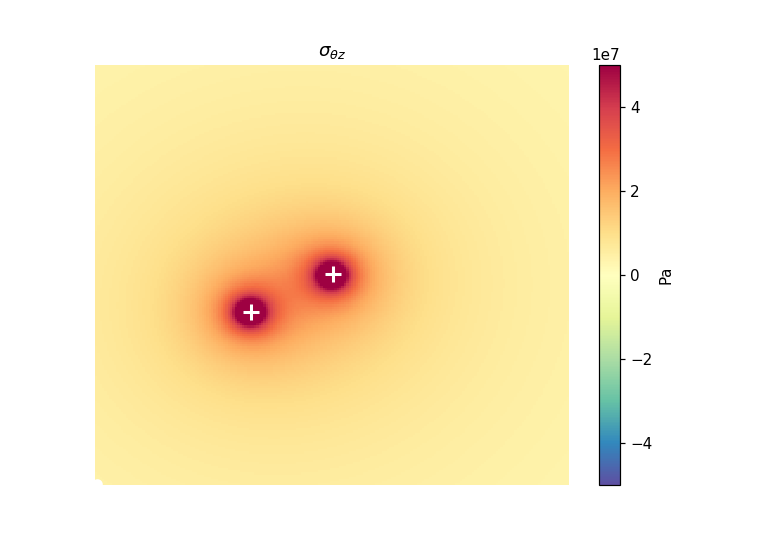

In [17]:
fig,dis1,dis2=two_dislocations(component='tz')

In [18]:
interactive(add_dislocation, fig=fixed(fig), dis1=fixed(dis1),dis2=fixed(dis2),
            Ox=(0,200),Oy=(0,200),sign={"Opposite sign":-1,"Same sign":1},
            component=fixed('tz'))

interactive(children=(IntSlider(value=100, description='Ox', max=200), IntSlider(value=100, description='Oy', …

## Forces between dislocations

### Force vectors around an edge dislocation

The stress fields around a dislocation induce forces on nearby dislocations. 

The plots below show the magnitude of these forces for two edge dislocations of the opposite sign:

<IPython.core.display.Javascript object>


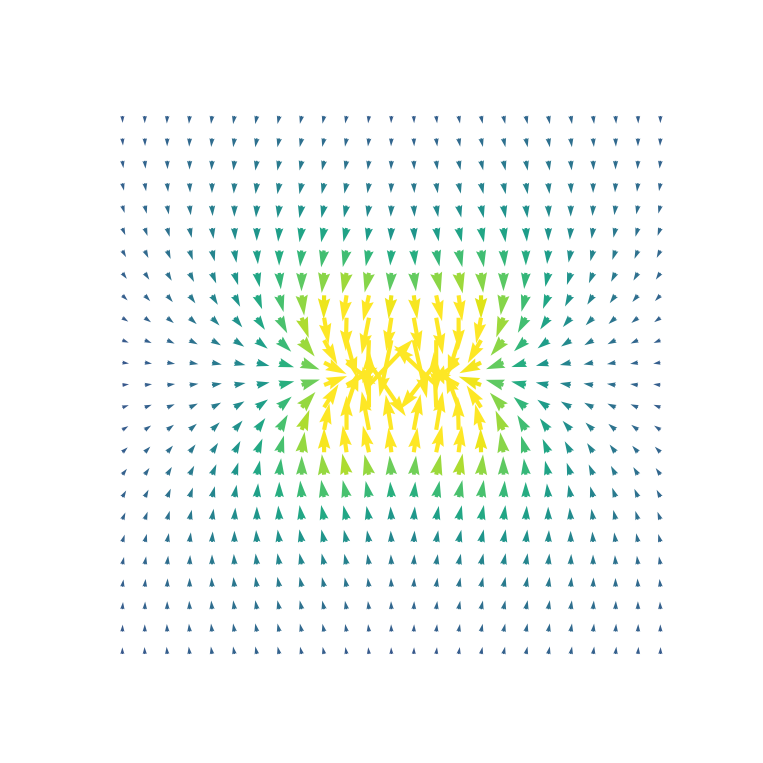

(-1.2000000000000002, 25.2, -1.2000000000000002, 25.2)

In [19]:
f_x,f_y=f_edge(X_axis[::8],Y_axis[::8],0.0,0.0,D,-1)
plt.figure(figsize=(7,7))
f_x[np.where(np.abs(f_x)>5e-3)]=np.NaN
f_y[np.where(np.abs(f_y)>5e-3)]=np.NaN
plt.quiver(f_x, (f_y),np.sqrt(f_x**2+f_y**2),width=0.007,clim=(0,2e-3),pivot='tail')
plt.axis('Off')
plt.axis('Equal')

### Glide forces only

Climb is only possible at high temperatures. Therefore we are often interested in the glide component only:

<IPython.core.display.Javascript object>


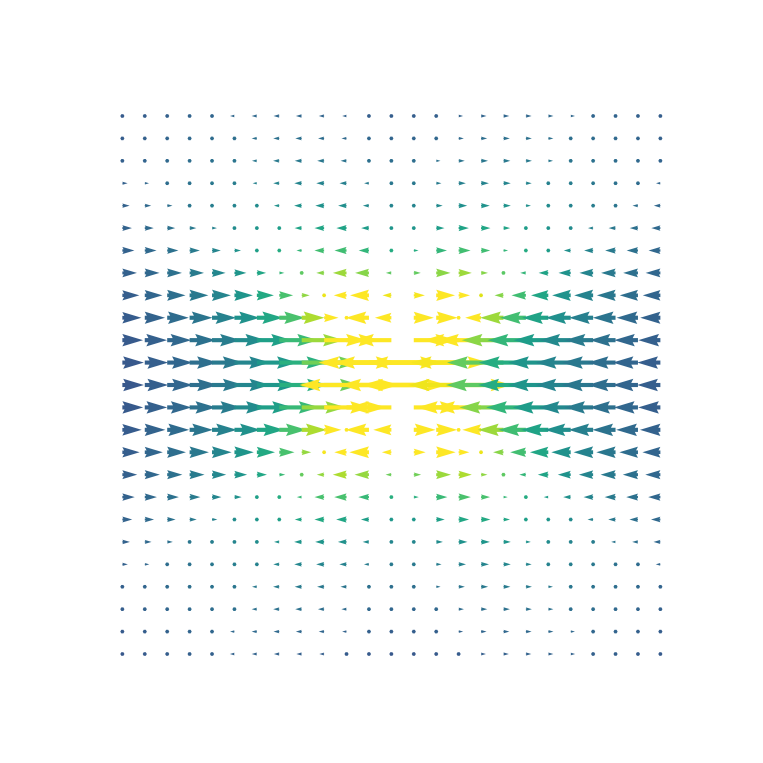

(-1.2000000000000002, 25.2, -1.2000000000000002, 25.2)

In [20]:
f_x,f_y=f_edge(X_axis[::8],Y_axis[::8],0.0,0.0,D,-1)
plt.figure(figsize=(7,7))
f_x[np.where(np.abs(f_x)>5e-3)]=np.NaN
plt.quiver(f_x, np.zeros(np.shape(f_y)),np.sqrt(f_x**2+f_y**2),width=0.007,clim=(0,2e-3),pivot='tail')
plt.axis('Off')
plt.axis('equal')

This shows how the direction of the force depends on the x and y position, as could be expected from the shear stress map.

<IPython.core.display.Javascript object>


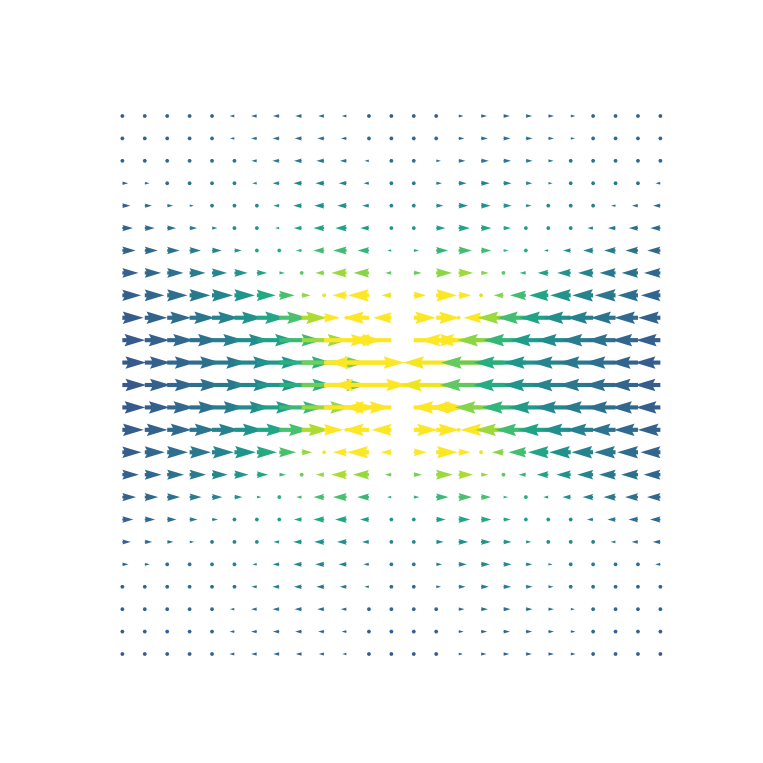

(-1.2000000000000002, 25.2, -1.2000000000000002, 25.2)

In [21]:
f_x,f_y=f_edge(X_axis[::8],Y_axis[::8],0.0,0.0,D,-1)
plt.figure(figsize=(7,7))
f_x[np.where(np.abs(f_x)>2e-3)]=np.NaN
plt.quiver(f_x, np.zeros(np.shape(f_y)),np.sqrt(f_x**2+f_y**2),width=0.007,clim=(0,2e-3),pivot='tail')
plt.axis('Off')
plt.axis('equal')

------------------------------------------------------
João Fonseca

Manchester, January 2017